In [1]:
import requests
from bs4 import BeautifulSoup as soup

In [9]:
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36','referer':'https://www.glassdoor.com/'}

In [10]:
html = requests.get('https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword=%22data+scientist%22&sc.keyword=%22data+scientist%22&locT=&locId=&jobType=')
html.status_code

403

In [11]:
bsobj = soup(html.content,'lxml')
bsobj

<!DOCTYPE html>

<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/">
<head>
<title>Apache Tomcat - Error report</title>
<link href="/jobSearch/static/css/gd-jobSearch.css?v=fc6a9" media="all" rel="stylesheet"/><link href="/jobSearch/static/css/gd-vendor.bundle.css?v=fc6a9" media="all" rel="stylesheet"/>
<script defer="" src="/jobSearch/static/js/gd-vendor.bundle.js?v=fc6a9" type="text/javascript"></script><script defer="" src="/jobSearch/static/js/gd-jobSearch.bundle.js?v=fc6a9" type="text/javascript"></script>
</head>
<body><h1>HTTP Status 403 - Bots not allowed</h1><div class="line"></div><p><b>type</b> Status report</p><p><b>message</b> <u>Bots not allowed</u></p><p><b>description</b> <u>Access to the specified resource has been forbidden.</u></p><hr class="line"/><h3>Apache Tomcat</h3></body>
</html>

In [12]:
from urllib.request import Request, urlopen
url = 'https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword=%22data+scientist%22&sc.keyword=%22data+scientist%22&locT=&locId=&jobType='
req = Request(url, headers = headers)

webpage = urlopen(req).read()

<!DOCTYPE html>

<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/">
<head>
<title>" data scientist " Jobs | Glassdoor</title>
<meta content="origin" name="referrer"/><meta content="width=device-width" name="viewport"/><meta content="#0caa41" name="theme-color"/><meta content="#0caa41" name="msapplication-navbutton-color"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="#0caa41" name="apple-mobile-web-app-status-bar-style"/><meta content="589698942" property="al:ios:app_store_id"/><meta content="Glassdoor" property="al:ios:app_name"/><meta content="At9LpmW/SGKoQafqVaHTfeX5N9lRrOEZw0dAoUrKiO21CAbclpg0c0XecEzX5QigJaDNvdHGhDU8tDKRRduS6AYAAABmeyJvcmlnaW4iOiJodHRwczovL2dsYXNzZG9vci5jb206NDQzIiwiZmVhdHVyZSI6Ikluc3RhbGxlZEFwcCIsImV4cGlyeSI6MTUxNDI1NjE5NCwiaXNTdWJkb21haW4iOnRydWV9" data-expires="2017-12-26" data-feature="getInstalledRelatedApps" http-equiv="origin-trial"/><meta content="no-cache,must-revalidate" http-equ
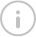

In [14]:
bsobj = soup(webpage,'lxml')
bsobj

In [15]:
company_name = []

for company in bsobj.findAll('div',{'class':'jobHeader d-flex justify-content-between align-items-start'}):
    company_name.append(company.a.text.strip())

company_name

['BankUnited',
 'Big Fish Games',
 '11Health and Technologies Inc',
 'Presbyterian Healthcare Services',
 'GEICO',
 'Johns Hopkins Applied Physics Laboratory (APL)',
 'Opportunity Fund',
 'Watlow Electric Manufacturing',
 'Varen Technologies',
 'Acuity Insurance',
 'The Mars Agency',
 'Buckman',
 'Farm Credit Mid-America',
 'Excella Consulting',
 'Purchasing Power',
 'Mindoula Health Inc',
 'realtor.com',
 'Portland General Electric',
 'EQRx',
 'Analysis Group',
 'Elevate Credit',
 'Global Atlantic Financial Group',
 'Florida Blue',
 'Eiden Systems Corporation',
 'Aptean',
 'Vizient, Inc.',
 'Legal & General America',
 'Carvana',
 'Walton Isaacson',
 'Fracta']

In [17]:
job_title = []
for title in bsobj.findAll('div',{'class':'d-flex flex-column pl-sm css-nq3w9f'}):
    job_title.append(title.findAll('a')[1].text.strip())
    
job_title

['FCC Data Scientist',
 'Senior Data Scientist',
 'Full Time Sr. Data Scientist - Irvine, Ca',
 'LEAD DATA SCIENTIST',
 'Principal Data Scientist',
 'Data Scientist',
 'Senior Business Intelligence (BI) Data Scientist',
 'Senior Engineer/Data Scientist - Industry 4.0',
 'Data Scientist',
 'Senior Research Statistician- Data Scientist',
 'Senior Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Staff Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Principal, Data Scientist',
 'AVP, Data Scientist (Virtual / Remote - Greater Boston)',
 'Data Scientist',
 'Mid and Senior Level Data Scientists',
 'Senior Marketing Data Scientist',
 'Data Scientist',
 'Senior Data Scientist',
 'Decision Support Systems Data Scientist',
 'Data Scientist',
 'Senior Data Scientist']

In [18]:
location = []
for i in bsobj.findAll('div',{'class':'d-flex flex-wrap css-yytu5e e1rrn5ka1'}):
    location.append(i.span.text.strip())
    
location

['Miami Lakes, FL',
 'Oakland, CA',
 'San Diego, CA',
 'Albuquerque, NM',
 'Chevy Chase, MD',
 'Laurel, MD',
 'Remote',
 'Saint Louis, MO',
 'Annapolis Junction, MD',
 'Sheboygan, WI',
 'Rogers, AR',
 'Memphis, TN',
 'Louisville, KY',
 'Arlington, VA',
 'Atlanta, GA',
 'Maryland',
 'Santa Clara, CA',
 'Portland, OR',
 'Cambridge, MA',
 'Boston, MA',
 'Addison, TX',
 'Massachusetts',
 'Jacksonville, FL',
 'Charlottesville, VA',
 'Alpharetta, GA',
 'Chicago, IL',
 'Frederick, MD',
 'Tempe, AZ',
 'Culver City, CA',
 'Redwood City, CA']

In [19]:
links = []
for i in bsobj.findAll('div',{'class':'jobHeader d-flex justify-content-between align-items-start'}):
    link = 'https://www.glassdoor.co.in'+i.a['href']
    links.append(link)
    
links

['https://www.glassdoor.co.in/partner/jobListing.htm?pos=101&ao=1177773&s=149&guid=000001772a97aac0bc38745f2c9ac76f&src=GD_JOB_AD&t=SRFJ&vt=w&cs=1_37568b4c&cb=1611327319166&jobListingId=3672655870',
 'https://www.glassdoor.co.in/partner/jobListing.htm?pos=102&ao=1044074&s=149&guid=000001772a97aac0bc38745f2c9ac76f&src=GD_JOB_AD&t=SRFJ&vt=w&cs=1_63582cc9&cb=1611327319166&jobListingId=3796749005',
 'https://www.glassdoor.co.in/partner/jobListing.htm?pos=102&ao=1044077&s=58&guid=000001772a97aac081b663e721a84982&src=GD_JOB_AD&t=SR&vt=w&ea=1&cs=1_71df9752&cb=1611327319167&jobListingId=3796033215',
 'https://www.glassdoor.co.in/partner/jobListing.htm?pos=104&ao=1044074&s=58&guid=000001772a97aac081b663e721a84982&src=GD_JOB_AD&t=SR&vt=w&cs=1_e1c6a65e&cb=1611327319167&jobListingId=3798995946',
 'https://www.glassdoor.co.in/partner/jobListing.htm?pos=105&ao=1044074&s=58&guid=000001772a97aac081b663e721a84982&src=GD_JOB_AD&t=SR&vt=w&cs=1_c0b0ca7d&cb=1611327319168&jobListingId=3788094347',
 'https:/

In [20]:
description = []

for link in links:
    page = requests.get(link,headers = headers)
    bs = soup(page.content,'lxml')
    for job in bs.findAll('div',{'id':'JobDescriptionContainer'})[0]:
        description.append(job.text.strip())

In [21]:
description

['',
 "Requisition Number:\n\n4199\n\nJob Title:\n\nFCC Data Scientist\n\nLocation City:\n\nMiami Lakes\n\nLocation State:\n\nFlorida\n\nJob Description:\n\n\n\nSummary: The FCC Analytics group is responsible for the development and management of the BSA/AML, Fraud and Quality Control analytics functions. The group tunes the financial crimes models dedicated to the detection of suspicious activity and fraudulent transactions as well as those designed to risk rate customers and screen against OFAC designated lists. Additionally, the group manages application related implementations, maintenance and enhancements and the development of reporting and visual analytics used for investigations, KPI tracking, quarterly reporting and annual risk assessments.\n\n\nThe primary purpose of this position is to assist with the management of the Fraud and BSA/AML models related to transaction monitoring, customer risk rating, OFAC fuzzy logic filtering, and transactional fraud mitigation strategies. T

In [32]:
ratings = []

for i in bsobj.findAll('div',{'class':'d-flex flex-column css-fbt9gv e1rrn5ka2'}):
    ratings.append(i.findAll('span')[1].text.strip())
    
ratings

['3.3',
 '3.2',
 '',
 '3.7',
 '3.5',
 '4.7',
 '3.8',
 '3.4',
 '4.2',
 '4.9',
 '3.8',
 '3.8',
 '4.1',
 '4',
 '3.2',
 '3.9',
 '3.2',
 '3.5',
 '5',
 '4',
 '3.8',
 '4.4',
 '3.7',
 '4.9',
 '3.2',
 '4.1',
 '4.3',
 '3.5',
 '2.1',
 '']

In [57]:
salaryEstimates = []

for i in bsobj.findAll('div',{'class':'salaryEstimate css-nq3w9f pr-xxsm'}):
    salaryEstimates.append(i.findAll('span')[0].text.strip())
    
salaryEstimates

['$73K - $121K (Glassdoor est.)',
 '$109K - $175K (Glassdoor est.)',
 '$77K - $127K (Glassdoor est.)',
 '$104K - $170K (Glassdoor est.)',
 '$100K - $160K (Glassdoor est.)',
 '$89K - $141K (Glassdoor est.)',
 '$76K - $111K (Glassdoor est.)',
 '$99K - $110K (Glassdoor est.)',
 '$76K - $125K (Glassdoor est.)',
 '$83K - $135K (Glassdoor est.)',
 '$87K - $142K (Glassdoor est.)',
 '$72K - $121K (Glassdoor est.)',
 '$74K - $123K (Glassdoor est.)',
 '$123K - $196K (Glassdoor est.)',
 '$106K - $172K (Glassdoor est.)',
 '$75K - $131K (Glassdoor est.)',
 '$129K - $207K (Glassdoor est.)',
 '$66K - $116K (Glassdoor est.)',
 '$84K - $136K (Glassdoor est.)',
 '$94K - $155K (Glassdoor est.)',
 '$83K - $136K (Glassdoor est.)',
 '$89K - $143K (Glassdoor est.)',
 '$81K - $137K (Glassdoor est.)']

[<div class="salaryEstimate css-nq3w9f pr-xxsm"><style data-emotion-css="1imh2hq">.css-1imh2hq{font-size:14px;color:#505863;}.css-1imh2hq svg{height:1.35em;width:1.35em;}.css-1imh2hq .e1wijj240{font-size:0.9em;margin:0 4px;position:relative;}.css-1imh2hq .e1wijj240 .checkmark{margin-right:4px;}.css-1imh2hq .greyInfoIcon{cursor:pointer;display:-webkit-inline-box;display:-webkit-inline-flex;display:-ms-inline-flexbox;display:inline-flex;position:relative;top:0.25em;-webkit-transform:scale(0.8);-ms-transform:scale(0.8);transform:scale(0.8);}.css-1imh2hq .e1wijj241{background-image:url('');background-size:cover;display:inline-block;margin:0 0 1px 3px;height:14px;width:14px;}.css-1imh2hq .e1wijj241:hover{cursor:pointer;}</style><span class="css-1imh2hq e1wijj242" data-test="detailSalary">$73K - $121K <style data-emotion-css="0"></style><span class="css-0 e1wijj240">(Glassdoor est.)</span><span class="SVGInline greyInfoIcon" data-test="salaryIcon"><svg class="SVGInline-svg greyInfoIcon-svg" 
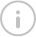

In [115]:
test=bsobj.findAll('div',{'class':'salaryEstimate css-nq3w9f pr-xxsm'})
print(test)

In [121]:
size = []



maindiv=bsobj.findAll('div',{'class':'css-jrwyhi e856ufb7'})
print(maindiv)

[]
